In [1]:
#Librerias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import SelectKBest

In [2]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=MinMaxScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))
    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))
    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1]);

    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))

    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues');

    
    return

In [3]:
#Hagamos regresion logística con el data set FINAL

#Levantamos la data
data = pd.read_csv('PVR_train_test.csv')

#Generamos el X y el target
X= data.drop(['ID','x','y', 'punto_tipo', 'Target'], axis=1)  
y= data['Target']

#Divimos en train y en test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size= 0.25, random_state= 42)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

#with open('./Models/logist-regresion-scaler.pkl', 'wb') as s:
    #pickle.dump(scaler, s)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

C:\Users\DataScience\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DataScience\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

C:\Users\DataScience\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DataScience\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       140
         1.0       0.52      0.55      0.53        62

    accuracy                           0.70       202
   macro avg       0.65      0.66      0.66       202
weighted avg       0.71      0.70      0.71       202

Area bajo la curva ROC: 0.6834
Area bajo la curva Precision-Recall: 0.575


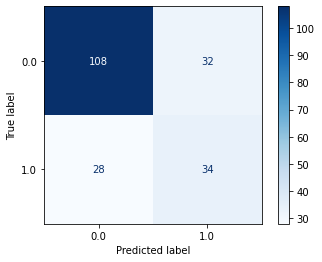

In [4]:
logistic_regression_report(X_train_std, X_test_std, y_train, y_test)

In [15]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy='majority');

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
1.0    186
0.0    186
Name: Target, dtype: int64

Composición del test set:
0.0    140
1.0     62
Name: Target, dtype: int64


C:\Users\DataScience\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DataScience\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

              precision    recall  f1-score   support

         0.0       0.67      0.49      0.56       140
         1.0       0.29      0.47      0.36        62

    accuracy                           0.48       202
   macro avg       0.48      0.48      0.46       202
weighted avg       0.55      0.48      0.50       202

Area bajo la curva ROC: 0.4647
Area bajo la curva Precision-Recall: 0.2713


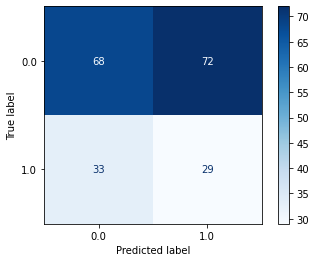

In [16]:
logistic_regression_report(X_train_us, X_test, y_train_us, y_test)

Select K best

In [6]:
from sklearn.feature_selection import SelectPercentile, f_regression

def select_percentile(data_frame, target, percentile=15):

    feat_selector = SelectPercentile(f_regression, percentile=percentile)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

per_feat = select_percentile(X, "Target", percentile=20)
per_feat = per_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
per_feat


KeyError: "['Target'] not found in axis"

In [14]:
precision_list = []

for k in range(1, 15):
    
    bk = f.SelectKBest(fs.f_classif, k)
    bk.fit(X_train, y_train)
    X_trans = bk.transform(X_train)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y_train,
                                                        test_size=0.25,
                                                        random_state=42)
    
    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    precision = metrics.accuracy_score(test_y, y_pred)
    precision_list.append(precision)

fig, axe = plt.subplots(dpi = 100)
axe.plot(range(1, 15), precision_list)
axe.set_xlabel("best k features")
axe.set_ylabel("Precision")
plt.show(fig)

NameError: name 'fs' is not defined

In [10]:
sel_f = SelectKBest(f_classif, k=7)
X_train_f = sel_f.fit_transform(X_train, y_train)
Boolean= sel_f.get_support()
print(X_train.loc[:,Boolean].columns)

Index(['poblacion', '0-14', 'primario', 'secundario', 'polimodal',
       'lee_y _esc', 'NoLee_ni_e'],
      dtype='object')


GridSearchCV

In [7]:
# Buscamos los mejores hiperparametros

X_best = X

X_best_std = scaler.fit_transform(X)

X_train_best, X_test_best, y_train, y_test = train_test_split(X_best_std,y, stratify=y, test_size= 0.25, random_state= 99)

#X_train_us,y_train_us=undersampler.fit_resample(X_train_best,y_train)

modelo = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3)
grid_search = GridSearchCV(estimator=modelo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_best, y_train)

# Vemos los resultados

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.716720 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.705269 (0.057771) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.706362 (0.059594) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.705269 (0.057771) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.700842 (0.053673) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.700842 (0.053673) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.700842 (0.053673) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.696971 (0.054642) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696971 (0.054642) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.701900 (0.053279) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.716720 (0.045059) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716720 (0.045059) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.712903 (0.041529) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.693226 (0.010348) wit

In [8]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Oranges',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [10]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
modelo = LogisticRegression(C=0.1, penalty = 'l2', solver= 'newton-cg')
modelo.fit(X_train_best, y_train)

#with open('./Models/logist-regresion.pkl', 'wb') as model_pk:
    #pickle.dump(modelo, model_pk)


LogisticRegression(C=0.1, solver='newton-cg')

In [11]:
#Para UN solo fold
#Hacemos las predicciones necesarias
y_pred = modelo.predict(X_test_best)
print(y_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(y_test, y_pred))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Score:  0.6831683168316832


In [14]:
y_test.value_counts()/202

0.0    0.693069
1.0    0.306931
Name: Target, dtype: float64

In [44]:
cf_matrix_a = confusion_matrix(y_pred,y_test)

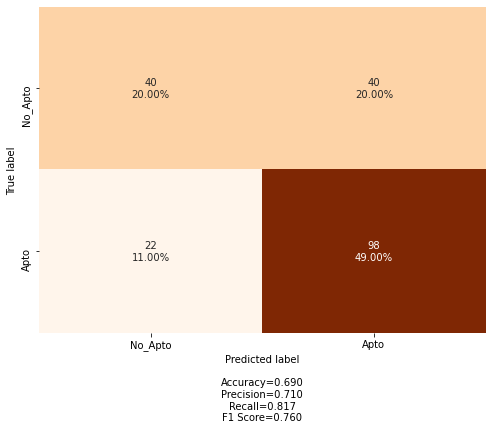

In [45]:
make_confusion_matrix(cf_matrix_a, categories= ['No_Apto', 'Apto'] , figsize=(8,6), cbar=False)

In [46]:
y_pred_proba = modelo.predict_proba(X_test_best)

In [47]:
# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

#Cambiamos el umbral
y_pred_logit = (y_probs_logit_left > 0.3).astype(int)
cf_matrix_a_logit = confusion_matrix(y_pred_logit,y_test)

In [48]:
print('Matrix Original')
display(confusion_matrix(y_pred,y_test))
print('')
print('Nueva Matrix')
display(confusion_matrix(y_pred_logit,y_test))

Matrix Original


array([[40, 40],
       [22, 98]], dtype=int64)


Nueva Matrix


array([[ 13,  10],
       [ 49, 128]], dtype=int64)

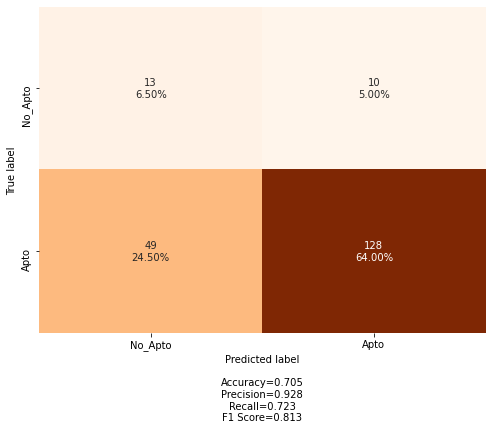

In [49]:
make_confusion_matrix(cf_matrix_a_logit, categories= ['No_Apto','Apto'] , figsize=(8,6), cbar=False)

In [50]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

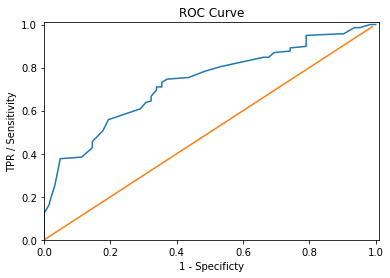

In [51]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [ ]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.7193197755960729


Hacemos las predicciones sobre todas las esquinas

In [52]:
#Traemos los datos sobre las predicciones
PV = pd.read_csv('DAM_to_predict_PV.csv')
R = pd.read_csv('DAM_to_predict_R.csv')
DAM_to_predict= pd.read_csv('DAM_to_predict.csv')

In [53]:
#Prediciones_R = modelo.predict(R)
#Predicciones_PV = modelo.predict(PV)
Predicciones = modelo.predict(DAM_to_predict)

ValueError: X has 7 features per sample; expecting 5

In [ ]:
Predicciones_PV

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
Prediciones_R

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
PV['predicciones'] = Predicciones_PV
R['predicciones'] = Prediciones_R

In [ ]:
PV['predicciones'].value_counts()

1    2284
0      91
Name: predicciones, dtype: int64

In [49]:
DAM_to_predict['predicciones'] = Predicciones

In [51]:
DAM_to_predict['predicciones'].value_counts()

1    2375
Name: predicciones, dtype: int64